## **Welcome to Week Two of BrainTank Deep Learning:**


Lets get started:

---

First thing we are going to do is run this piece of code that will download important files for this weeks challenge. Take a look at:

1.   DiamondList.csv

In [2]:
!git clone https://github.com/BrainTankDeepLearning/Week2.git

Cloning into 'Week2'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 20 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.


Helper Functions:
---
Here I have provided two helper functions that will help us use and view some of the data we working with. You DO NOT need to edit any of these, but feel free to play around with them.

In [3]:
import torch
from torch.nn import Module
import numpy as np
import csv
import matplotlib.pyplot as plt
import os
import pandas as pd
import math

def process_data():
  # Reads whites and reds path csv file and returns a pandas
  # 2d array of all the data in it
  diamond_filepath = "Week2/Diamonds.csv"
  diamond_df = pd.read_csv(diamond_filepath)

  diamond_df['D'] = (diamond_df['Colour'] == "D").astype(int)
  diamond_df['E'] = (diamond_df['Colour'] == "E").astype(int)
  diamond_df['F'] = (diamond_df['Colour'] == "F").astype(int)
  diamond_df['G'] = (diamond_df['Colour'] == "G").astype(int)
  diamond_df['H'] = (diamond_df['Colour'] == "H").astype(int)
  diamond_df['I'] = (diamond_df['Colour'] == "I").astype(int)
  diamond_df['J'] = (diamond_df['Colour'] == "J").astype(int)

  for diamond_clarity in ["FL", "IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2"]:
    diamond_df[diamond_clarity] =  (diamond_df['Clarity'] == diamond_clarity).astype(int)

  for diamond_shape in ["Cushion", "Emerald", "Heart", "Oval", "Pear", "Princess", "Radiant", "Round"]:
    diamond_df[diamond_shape] =  (diamond_df['Shape'] == diamond_shape).astype(int)

  diamond_df.to_csv("DiamondList.csv")

  return diamond_df

#Reads data from csv file
def read_data():
  diamond_filepath = "Week2/DiamondList.csv"
  diamond_df = pd.read_csv(diamond_filepath)

  diamond_df = diamond_df.drop(columns = ["Unnamed: 0", "Co_Ref_No", "Shape", "Price_CA$", \
                             "Cut", "Colour", "Clarity", "Shape_No"])
  
  diamond_df["Price"] = np.log10(diamond_df["Price"])
  diamond_df = diamond_df.sample(frac = 1, random_state = 0)

  diamond_df[["Carat", "Price"]]=(diamond_df[["Carat", "Price"]]-diamond_df[["Carat", "Price"]].min())/(diamond_df[["Carat", "Price"]].max()-diamond_df[["Carat", "Price"]].min())
  diamond_df.to_csv("DiamondList.csv")

  diamond_df.to_csv("TrimmedMysteryDiamonds.csv")

  diamonds = torch.from_numpy(diamond_df.values)
  diamonds = diamonds.float()

  return diamonds

#this function transforms a normalized cost into
# a dollar value  
def normalized_cost_to_dollars(normalized):
  minimum_value = math.log10(1628.67)
  maximum_value = math.log10(393183.50)

  price = normalized * (maximum_value - minimum_value) + minimum_value
  price = 10 ** price

  return price

# Our Tasks:

---

**1.   Normalize all the necessary columns of data to be between 0 and 1**

Helpful Formula for normalizing a vector (list) of values:

*   x' = x - min(x) / [max(x) - min(x)]

**2.   Create a neural network that we can use to predict the value of a diamond given its Cut (Shape), Colour, Clarity and Carat**

*   Our model will have 24 inputs and go through a neural network with three hidden dimensions. 40 neurons, 20 neurons, and then 10 neurons. Those output to 1 output neuron that will predict the price of the diamond.


**3.   Devize a strategy to test our network and see if it is doin a good or bad job prediciting the cost of diamonds**

Loss: 0.028158187053868765
Loss: 0.021313108768030317
Loss: 0.02099527288643632
Loss: 0.020449415388942033
Loss: 0.01947903539969178
Loss: 0.01783443749424703
Loss: 0.015336538324106447
Loss: 0.011869465073448883
Loss: 0.007394031886424562
Loss: 0.0034787199071865532
Loss: 0.0020872316813437242
Loss: 0.0016234690757935782
Loss: 0.0013505959819537748
Loss: 0.001173979075051857
Loss: 0.0010515314843664704
Loss: 0.0009622890132409827
Loss: 0.0008951859738094677
Loss: 0.0008437373417417708
Loss: 0.0008038020868481281
Loss: 0.0007725519727495108
Loss: 0.0007479623861275502
Loss: 0.0007285265092061982
Loss: 0.0007131042733871622
Loss: 0.0007008135389320718
Loss: 0.000690968038717161
Loss: 0.0006830276469679557
Loss: 0.0006765680695003891
Loss: 0.000671253604418593
Loss: 0.0006668186193306291
Loss: 0.0006630522490126332
Loss: 0.0006597877316701796
Loss: 0.0006568918297726257
Loss: 0.0006542583358999938
Loss: 0.0006518020790770194
Loss: 0.0006494540283868186
Loss: 0.0006471579981136554
Loss: 0

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Target ($):  8603.330204464535 Prediction ($):  8377.670227470417 Correct
Loss:  9.409150152350776e-06 Target ($):  3711.2698972908793 Prediction ($):  3649.3336663341743 Correct
Loss:  0.0005661215982399881 Target ($):  3324.5000718619 Prediction ($):  3788.088754181693 Correct
Loss:  0.00029000063659623265 Target ($):  2254.6999848428627 Prediction ($):  2475.516260584007 Correct
Loss:  0.00012751085159834474 Target ($):  6614.13970710236 Prediction ($):  6216.802151931967 Correct
Loss:  0.0003159230400342494 Target ($):  4418.960171913236 Prediction ($):  4871.602411879253 Correct
Loss:  3.470031515462324e-05 Target ($):  6669.219539796608 Prediction ($):  6888.2855866302925 Correct
Loss:  0.0002261205663671717 Target ($):  2758.370054713607 Prediction ($):  2995.593314839144 Correct
Loss:  0.0006134890136308968 Target ($):  22907.931234794098 Prediction ($):  19997.14173660292 Correct
Loss:  7.716565596638247e-05 Target ($):  5328.199849523861 Prediction ($):  5077.493469491947 Cor

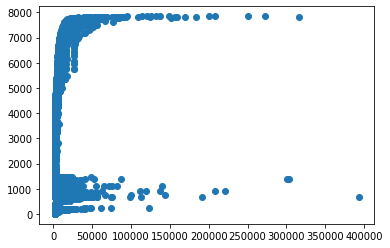

In [10]:
class WinePredictor(torch.nn.Module):
    def __init__(self):

        super(WinePredictor, self).__init__()

        # Your code here:
        pass

    def forward(self, data):
        pass

def train(model, training_dataset, optimizer, loss_function):
  #your code here
  #train the model
  pass

def test(model, test_dataset, loss_fn):
  #test to see if our code works
  #your code here
  pass